# Personal Information
Name: **Zefan ZHU**

StudentID: **14930595**

Email: [**zefan.zhu@student.uva.nl**](youremail@student.uva.nl)

Submitted on: **22.03.2024**

# Data Context

Diabetes 130-US Hospitals for Years 1999-2008-The dataset represents ten years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. Each row concerns hospital records of patients diagnosed with diabetes, who underwent laboratory, medications, and stayed up to 14 days. 

# Data Description

It includes 50 features representing patient and hospital outcomes.

Information was extracted from the database for encounters that satisfied the following criteria.

(1)	It is an inpatient encounter (a hospital admission).

(2)	It is a diabetic encounter, that is, one during which any kind of diabetes was entered into the system as a diagnosis.

(3)	The length of stay was at least 1 day and at most 14 days.

(4)	Laboratory tests were performed during the encounter.

(5)	Medications were administered during the encounter.




In [751]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  






### Data Loading

In [752]:
# Load your data here
df=pd.read_csv("diabetic_data.csv")
df

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,443847548,100162476,AfricanAmerican,Male,[70-80),?,1,3,7,3,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,443847782,74694222,AfricanAmerican,Female,[80-90),?,1,4,5,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,443854148,41088789,Caucasian,Male,[70-80),?,1,1,7,1,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,443857166,31693671,Caucasian,Female,[80-90),?,2,3,7,10,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [753]:
df.head()


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [754]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [755]:
print(df.columns)

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')


# Processing with Missing Values

In [756]:
#Checking for wrong entries like symbols -,?,#,*,etc.
for col in df.columns:
    print('{} : {}'.format(col,df[col].unique()))


encounter_id : [  2278392    149190     64410 ... 443854148 443857166 443867222]
patient_nbr : [  8222157  55629189  86047875 ... 140199494 120975314 175429310]
race : ['Caucasian' 'AfricanAmerican' '?' 'Other' 'Asian' 'Hispanic']
gender : ['Female' 'Male' 'Unknown/Invalid']
age : ['[0-10)' '[10-20)' '[20-30)' '[30-40)' '[40-50)' '[50-60)' '[60-70)'
 '[70-80)' '[80-90)' '[90-100)']
weight : ['?' '[75-100)' '[50-75)' '[0-25)' '[100-125)' '[25-50)' '[125-150)'
 '[175-200)' '[150-175)' '>200']
admission_type_id : [6 1 2 3 4 5 8 7]
discharge_disposition_id : [25  1  3  6  2  5 11  7 10  4 14 18  8 13 12 16 17 22 23  9 20 15 24 28
 19 27]
admission_source_id : [ 1  7  2  4  5  6 20  3 17  8  9 14 10 22 11 25 13]
time_in_hospital : [ 1  3  2  4  5 13 12  9  7 10  6 11  8 14]
payer_code : ['?' 'MC' 'MD' 'HM' 'UN' 'BC' 'SP' 'CP' 'SI' 'DM' 'CM' 'CH' 'PO' 'WC' 'OT'
 'OG' 'MP' 'FR']
medical_specialty : ['Pediatrics-Endocrinology' '?' 'InternalMedicine'
 'Family/GeneralPractice' 'Cardiology' 'Surg

In [757]:
#There are null values in our dataset in form of ‘?’and 'Unknown/Invalid'  replace them into np.nan form.
for col in df.columns:
    df[col].replace({'?': np.nan, 'Unknown/Invalid': np.nan}, inplace=True)




In [758]:
#check msiing value once again after transformation
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                         2273
gender                          3
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum                   0
A1Cresult                       0
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

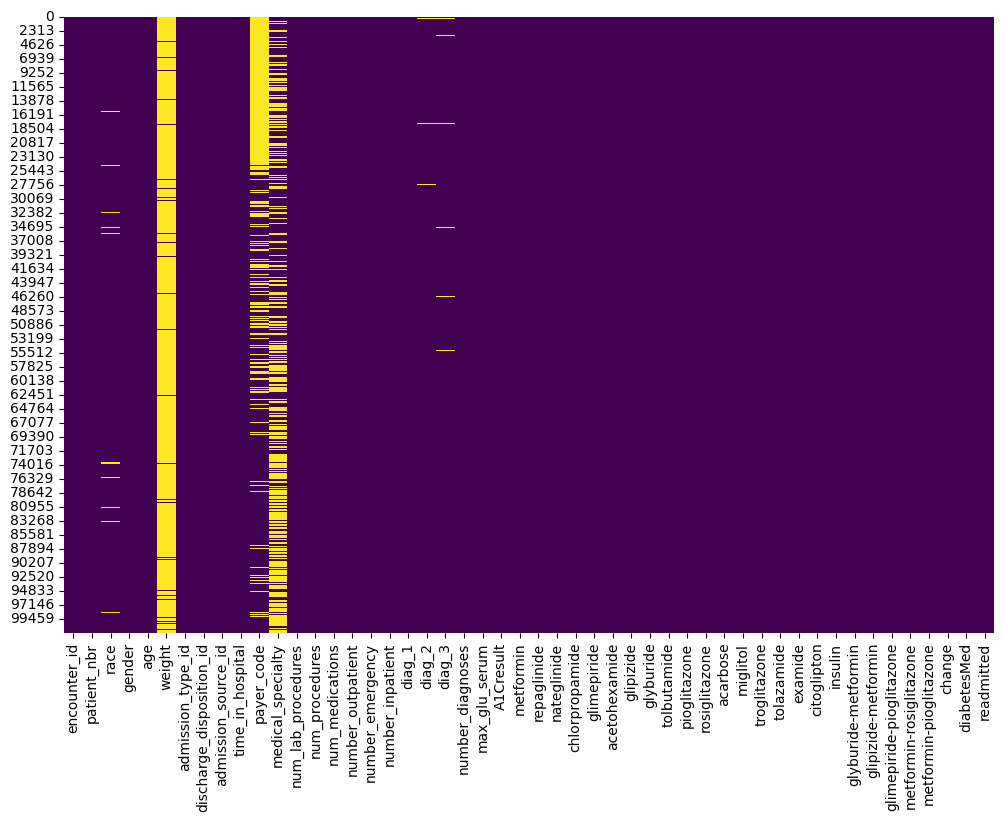

Proportion of missing values for columns with at least one missing value:
race                  2.233555
gender                0.002948
weight               96.858479
payer_code           39.557416
medical_specialty    49.082208
diag_1                0.020636
diag_2                0.351787
diag_3                1.398306
dtype: float64


In [759]:
#Visulising missingness of the dataset 
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels='auto')
plt.show()

#Calculate the proportion of missing values for columns that have at least one missing value
missing_proportions = df.loc[:, df.isnull().any()].isnull().mean() * 100
print("Proportion of missing values for columns with at least one missing value:")
print(missing_proportions)

## Removing  payer_code medical_specialty


In [760]:
## Removing the variables:  payer_code medical_specialty, as these two variables are not very useful for our analysis

# Columns to be removed
columns_to_remove = [ 'payer_code', 'medical_specialty']
df.drop(columns=columns_to_remove, inplace=True)


## Fill the 'diag_1', 'diag_2', 'diag_3'

In [761]:
#fill the 'diag_1', 'diag_2', 'diag_3' with the corresponding most common value in that missing-value columns.

columns_to_fill = ['diag_1', 'diag_2', 'diag_3']

# Create a dictionary to hold the most common value for each column
most_common_values = {}

for column in columns_to_fill:
    # Find the most common value (mode) for the current column
    most_common_value = df[column].mode()[0]
    
    # Store the most common value in the dictionary
    most_common_values[column] = most_common_value
    
    # Fill missing values in the column with the most common value
    df[column].fillna(value=most_common_value, inplace=True)


## Dropout 'Gender' and fill the 'race'

In [762]:
#dropout the rows which has missing value in gender
df.dropna(subset=['gender'], inplace=True)


In [763]:
# Fill NaN values in race with 'Other'
df['race'] = df['race'].fillna('Other')

## Checking the missing values again

In [764]:
# check the proportion of missing values in each column once again
missing_value_proportion = df.isnull().mean()

# Filter out columns that do not have any missing values
missing_value_proportion = missing_value_proportion[missing_value_proportion > 0]

# Print the proportion of missing values for columns with missing values
print(missing_value_proportion)





weight    0.968584
dtype: float64


# Duplicate value

In [765]:
# The data set contained multiple rows with the same patient_nbr.
print('Total data = ', len(df))
print('Unique entries = ', len(df['patient_nbr'].unique()))

# Mark all rows that have a duplicate 'patient_nbr', keeping the first occurrence unmarked
duplicates = df.duplicated(subset='patient_nbr', keep=False)

# Filter the DataFrame to only include duplicates
df_duplicates = df[duplicates]


# Sort the df_duplicates DataFrame by 'patient_nbr' so that rows with the same 'patient_nbr' are arranged together
df_duplicates_sorted = df_duplicates.sort_values(by='patient_nbr')

# Now df_duplicates_sorted will have all the duplicate rows grouped together by 'patient_nbr'
df_duplicates_sorted


Total data =  101763
Unique entries =  71515


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4780,26264286,135,Caucasian,Female,[50-60),NaN,1,1,7,3,...,No,No,No,No,No,No,No,Ch,Yes,>30
4267,24437208,135,Caucasian,Female,[50-60),NaN,2,1,1,8,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
1164,8380170,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,...,No,Steady,No,No,No,No,No,No,Yes,>30
5953,30180318,1152,AfricanAmerican,Female,[50-60),NaN,1,1,7,6,...,No,Down,No,No,No,No,No,Ch,Yes,>30
23623,80742510,1152,AfricanAmerican,Female,[60-70),NaN,1,1,7,8,...,No,Steady,No,No,No,No,No,No,Yes,>30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95640,364338650,188634893,Caucasian,Male,[70-80),NaN,3,1,1,4,...,No,Steady,No,No,No,No,No,No,Yes,>30
101595,441488168,188970179,Asian,Female,[70-80),NaN,1,3,7,6,...,No,Steady,No,No,No,No,No,No,Yes,NO
93050,330256946,188970179,Asian,Female,[70-80),NaN,1,6,7,4,...,No,Steady,No,No,No,No,No,Ch,Yes,<30
98191,397823084,189257846,Asian,Male,[60-70),NaN,1,1,7,2,...,No,Steady,No,No,No,No,No,No,Yes,>30


The data set contained multiple rows with the same patient_nbr. It was unclear if these encounters were independent. There was a risk that these multiple visits of a patient might be related, hence introduce bias since some encounters of a patient then become correlated. To eliminate this risk, kept one and only one encounter which had the maximum time_in_hospital, assuming time_in_hospital was characteristic for readmission.

In [766]:
#Find the index of the encounter with the maximum 'time_in_hospital' for each patient
idx = df.groupby('patient_nbr')['time_in_hospital'].idxmax()

# Filter the DataFrame to keep only the rows with the maximum 'time_in_hospital' for each patient
df_max_time = df.loc[idx]

# Print length after removing duplicates and selecting encounters with maximum 'time_in_hospital'
print('Length after keeping encounters with max time_in_hospital:', len(df_max_time))

Length after keeping encounters with max time_in_hospital: 71515


# Categorize the Data

## We categorize the data into 4 types:
    C1(Metadata):
    C2(Personal unchangeable data):
    C3(Personal changeable data):
    C4(Biomarker):

In [767]:
df_max_time.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'num_lab_procedures', 'num_procedures',
       'num_medications', 'number_outpatient', 'number_emergency',
       'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses',
       'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

C1: encounter_id, patient_nbr

C2:race,gender,age

C3: weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses,'diag_1', 'diag_2', 'diag_3','change', 'diabetesMed',readmitted

C4: 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide',
       'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide',
       'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose',
       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton',
       'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone'

# 1.1 Data Visualization and feature enginnering

## 1.1.1 Democraphic Data under C2

In [768]:
# Calculate counts for each category, including missing values

def print_counts_and_proportions(series, title):
    # Calculate proportions
    proportions = series / series.sum() * 100  # Convert to percentages

    # Combine counts and proportions into a DataFrame for easy display
    summary_df = pd.DataFrame({
        'Counts': series,
        'Proportions (%)': proportions.round(2)  # Round percentages to 2 decimal places
    })

    # Header
    print(f"{title} Distribution:")
    # Data
    print(summary_df.to_string())
    # Footer for separation
    print("\n" + "-" * 50 + "\n")

# Example usage with your series
print_counts_and_proportions(gender_counts, "Gender")
print_counts_and_proportions(race_counts, "Race")
print_counts_and_proportions(age_counts, "Age")



Gender Distribution:
        Counts  Proportions (%)
Female   38024            53.17
Male     33491            46.83

--------------------------------------------------

Race Distribution:
                 Counts  Proportions (%)
AfricanAmerican   12903            18.04
Asian               500             0.70
Caucasian         53513            74.83
Hispanic           1512             2.11
Other              3087             4.32

--------------------------------------------------

Age Distribution:
          Counts  Proportions (%)
[0-10)       154             0.22
[10-20)      528             0.74
[20-30)     1122             1.57
[30-40)     2678             3.74
[40-50)     6818             9.53
[50-60)    12437            17.39
[60-70)    15925            22.27
[70-80)    18185            25.43
[80-90)    11709            16.37
[90-100)    1959             2.74

--------------------------------------------------



/var/folders/35/7hgfkvbj20l_vmw7x1msfmym0000gn/T/ipykernel_51220/1938712317.py:35: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for label, count in counts.iteritems():


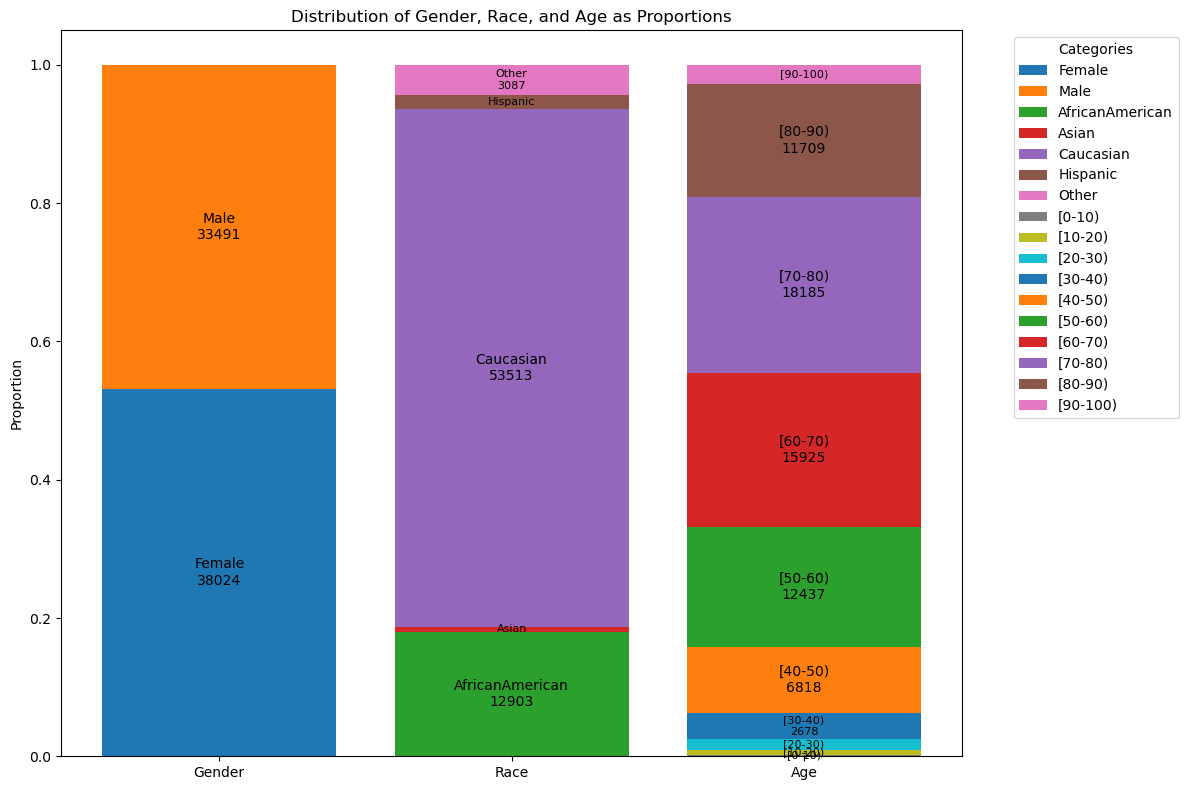

In [769]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'df_max_time' is your DataFrame and has been defined earlier

# Calculate counts for each category, including missing values
gender_counts = df_max_time['gender'].value_counts(dropna=False).sort_index()
race_counts = df_max_time['race'].value_counts(dropna=False).sort_index()
age_counts = df_max_time['age'].value_counts(dropna=False).sort_index()

# Setup the matplotlib figure for proportion visualization
fig, ax = plt.subplots(figsize=(12, 8))  # Increased figure size for better readability

# Function to add text within or beside the bar
def add_bar_text(ax, base, proportion, label, count, idx, total):
    y_pos = base + proportion / 2  # Middle of the segment
    fontsize = 10 if proportion > 0.05 else 8  # Adjust fontsize based on proportion
    text = f'{label}\n{count}'
    # For very small segments, adjust text placement or skip
    if proportion < 0.03:  # Threshold for too small to annotate
        if proportion > 0:  # If not zero, just annotate label without count
            text = f'{label}'
        else:  # If too small, consider not annotating or use a different approach
            text = ''
    ax.text(idx, y_pos, text, ha='center', va='center', fontsize=fontsize, color='black')

# Visualize the proportions with adjusted text annotations
variables = ['Gender', 'Race', 'Age']
counts_list = [gender_counts, race_counts, age_counts]

for idx, (variable, counts) in enumerate(zip(variables, counts_list)):
    total = counts.sum()
    proportions = counts / total
    bottom = 0
    for label, count in counts.iteritems():
        proportion = count / total
        label_text = f'{label}' if pd.notnull(label) else 'NaN'
        # Adjust bar width and color as necessary
        bar = ax.bar(idx, proportion, bottom=bottom, label=label_text)
        add_bar_text(ax, bottom, proportion, label_text, count, idx, total)
        bottom += proportion

ax.set_xticks(range(len(variables)))
ax.set_xticklabels(variables)
ax.set_ylabel('Proportion')
ax.set_title('Distribution of Gender, Race, and Age as Proportions')

plt.legend(title='Categories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## 1.1.2 Data under C3

#### Categorical data: weight, admission_type_id,discharge_disposition_id,admission_source_id,'diag_1', 'diag_2', 'diag_3','change', 'diabetesMed',readmitted

#### Numerical data: time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses

### Categorical data

##### weight

#### admission_type_counts, discharge_disposition_counts, and admission_source_counts


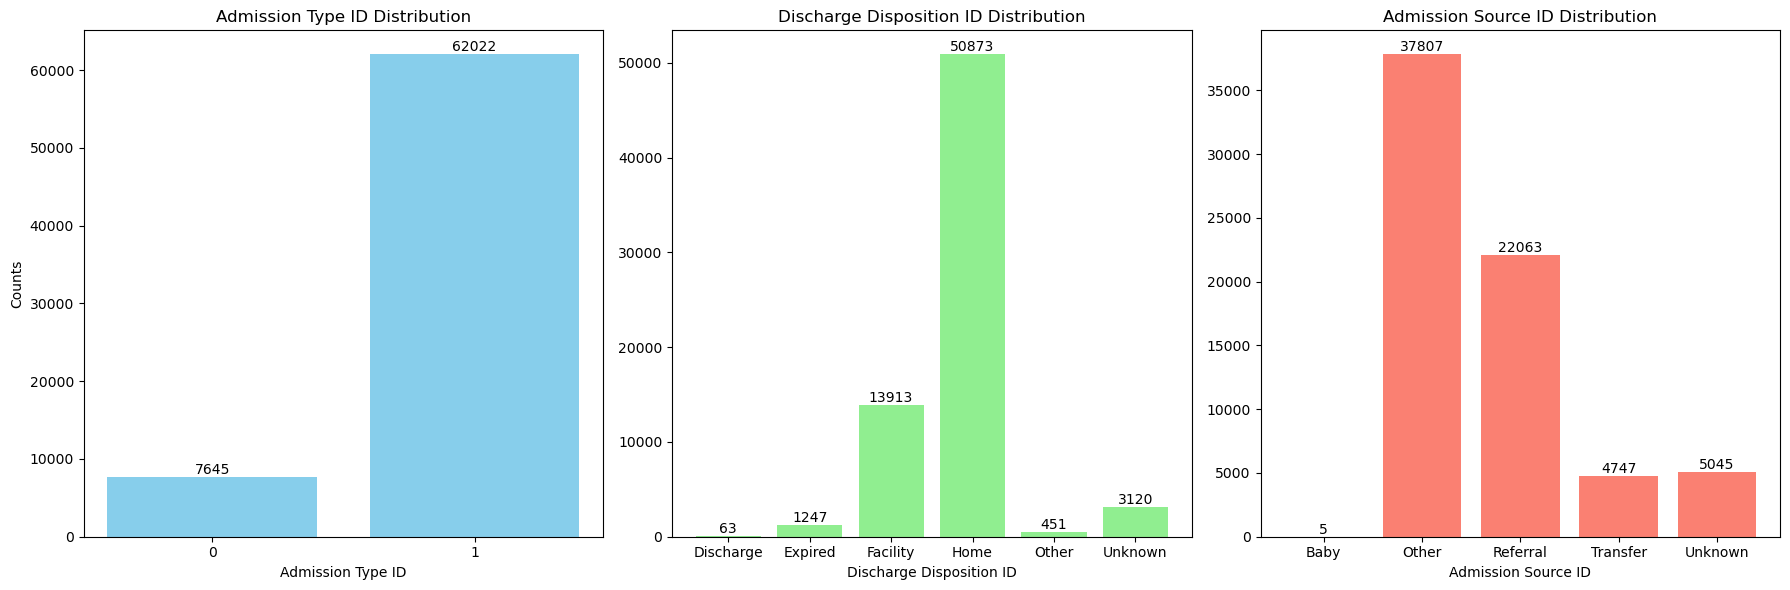

In [770]:

# Visualise the data of admission_type_counts, discharge_disposition_counts, and admission_source_counts


# Setup the matplotlib figure and axes
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Define a function to add labels on top of each bar
def add_labels(ax, series):
    for index, value in enumerate(series):
        ax.text(index, value, str(value), ha='center', va='bottom')

# Plotting with count numbers
axs[0].bar(admission_type_counts.index.astype(str), admission_type_counts.values, color='skyblue')
add_labels(axs[0], admission_type_counts)
axs[0].set_title('Admission Type ID Distribution')
axs[0].set_xlabel('Admission Type ID')
axs[0].set_ylabel('Counts')

axs[1].bar(discharge_disposition_counts.index.astype(str), discharge_disposition_counts.values, color='lightgreen')
add_labels(axs[1], discharge_disposition_counts)
axs[1].set_title('Discharge Disposition ID Distribution')
axs[1].set_xlabel('Discharge Disposition ID')

axs[2].bar(admission_source_counts.index.astype(str), admission_source_counts.values, color='salmon')
add_labels(axs[2], admission_source_counts)
axs[2].set_title('Admission Source ID Distribution')
axs[2].set_xlabel('Admission Source ID')

# Adjust layout for better visual presentation
plt.tight_layout()

plt.show()



#### Reduce the level of those categorical variables

##### admission_type_id

1 (Known type)= [1, 2, 3, 4, 7]

0 (Unknown type)


In [771]:
#"admission_type_id" can be  factored  from 8  levels to 2 levels according to the IDS_mapping.csv
df_max_time['admission_type_id'] = df_max_time['admission_type_id'].apply(lambda x: 1 if x in [1, 2, 3, 4, 7] else 0)


##### admission_source_id

Similarly Admission Source ID are converted into small number of categories

Referral = [1, 2, 3]

Transfer = [4, 5, 6, 10, 22, 25, 26]

Unknown = [9, 17, 20]

Baby = [11, 13, 14,17]

Other= [7, 8]

In [772]:

# Define a function to map admission_source_id to the new categories
def map_admission_source(admission_source_id):
    if admission_source_id in [1, 2, 3]:
        return 'Referral'
    elif admission_source_id in [4, 5, 6, 10, 22, 25, 26]:
        return 'Transfer'
    elif admission_source_id in [9, 17, 20]:
        return 'Unknown'
    elif admission_source_id in [11, 13, 14, 17]:
        return 'Baby'
    elif admission_source_id in [7, 8]:
        return 'Other'
    else:
        return 'Other'  # Default category for any id not listed

# Apply the mapping function to the admission_source_id column
df_max_time['admission_source_id'] = df_max_time['admission_source_id'].apply(map_admission_source)



##### discharge_disposition_id


Using domain knowledge to convert them distict values into small number of categories.

Discharge Disposition ID corresponding to [11 or 13 or 14 or 19 or 20 or 21] indicates patient has expired so there is no chance that it will readmit again so we will remove these records.

Discharge Disposition ID has lots of distinct values using domain knowledge we will convert them into small number of categories.

home = [1, 6, 8, 9, 13]

facility = [2, 3, 4, 5, 14, 22, 23, 24]

discharge = [10, 12, 15, 16, 17]

expired = [11, 19, 20, 21]

Unknown = [18, 25, 26]

In [773]:

# Define a function to map discharge_disposition_id to the new categories
def map_discharge_disposition(discharge_disposition_id):
    if discharge_disposition_id in [1, 6, 8, 9, 13]:
        return 'Home'
    elif discharge_disposition_id in [2, 3, 4, 5, 14, 22, 23, 24]:
        return 'Facility'
    elif discharge_disposition_id in [10, 12, 15, 16, 17]:
        return 'Discharge'
    elif discharge_disposition_id in [11, 19, 20, 21]:
        return 'Expired'
    elif discharge_disposition_id in [18, 25, 26]:
        return 'Unknown'
    else:
        return 'Other'  # Default category for any id not listed

# Apply the mapping function to the discharge_disposition_id column
df_max_time['discharge_disposition_id'] = df_max_time['discharge_disposition_id'].apply(map_discharge_disposition)




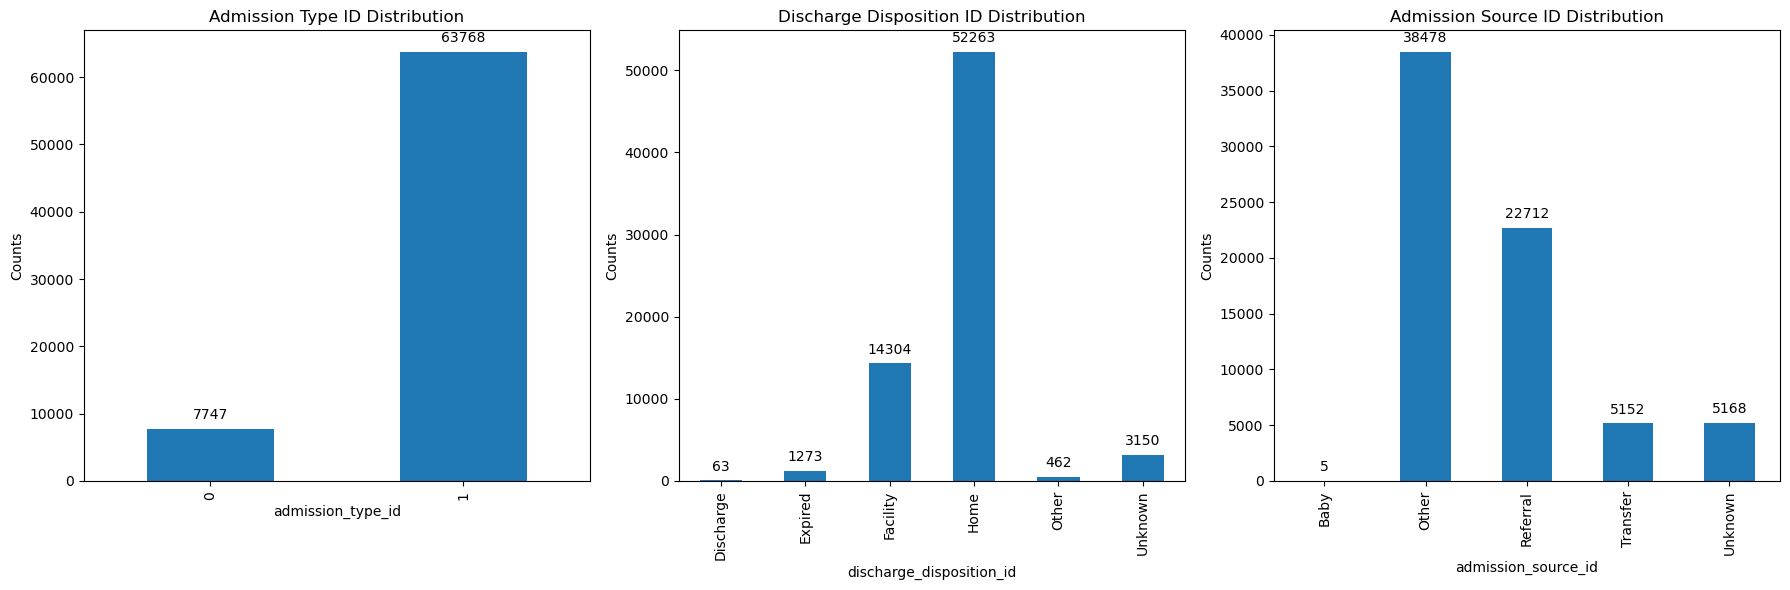

In [774]:

# Setup the matplotlib figure and axes for the bar charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Titles for each subplot
titles = ['Admission Type ID Distribution', 'Discharge Disposition ID Distribution', 'Admission Source ID Distribution']
# Variables to plot
variables_to_plot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for ax, variable, title in zip(axs, variables_to_plot, titles):
    # Calculate counts for the current variable
    counts = df_max_time[variable].value_counts().sort_index()
    # Plot the bar chart
    counts.plot(kind='bar', ax=ax)
    ax.set_title(title)
    ax.set_xlabel(variable)
    ax.set_ylabel('Counts')
    
    # Add count annotations to each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Adjust layout for better visual presentation
plt.tight_layout()
plt.show()



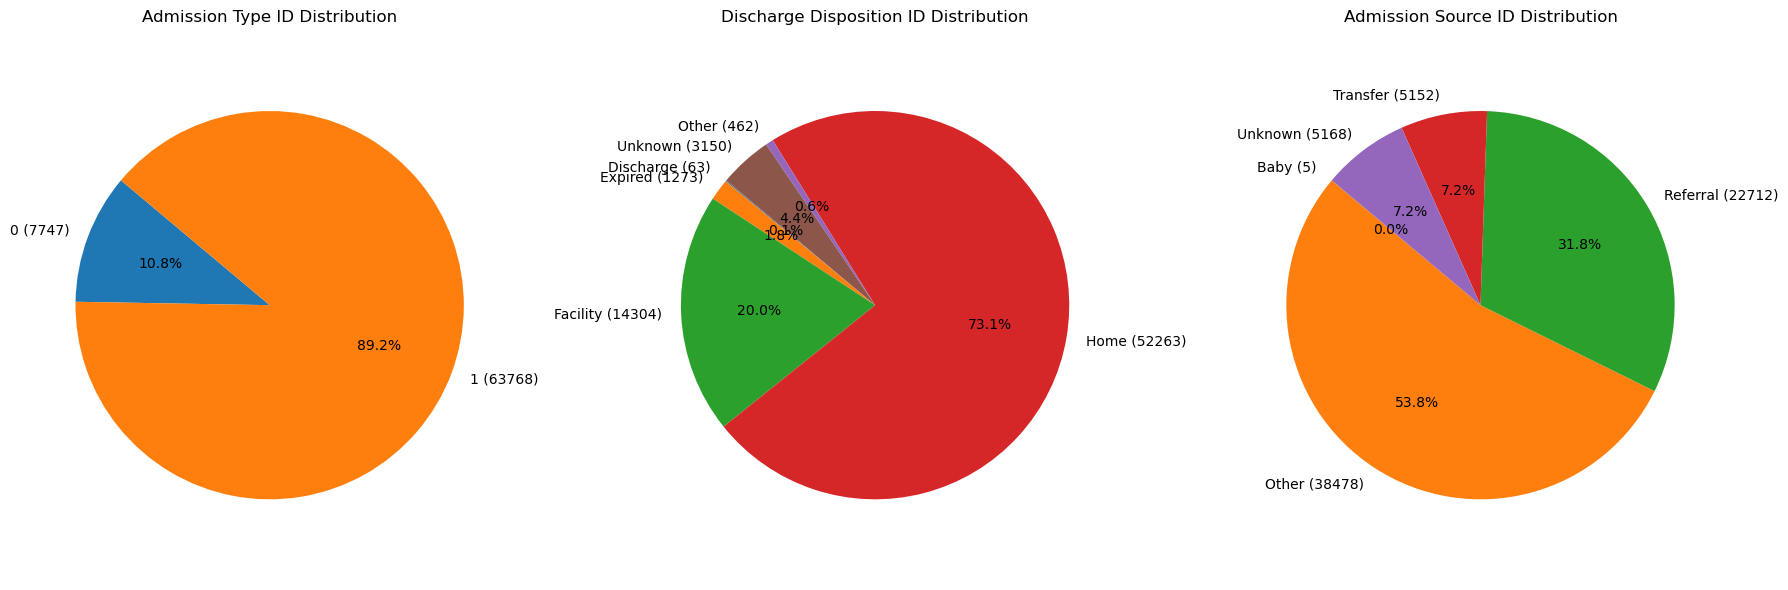

In [775]:
# Setup the matplotlib figure for the pie charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Titles for each subplot
titles = ['Admission Type ID Distribution', 'Discharge Disposition ID Distribution', 'Admission Source ID Distribution']
# Variables to plot
variables_to_plot = ['admission_type_id', 'discharge_disposition_id', 'admission_source_id']

for ax, variable, title in zip(axs, variables_to_plot, titles):
    # Calculate counts for the current variable
    counts = df_max_time[variable].value_counts().sort_index()
    # Generate labels for the pie chart, including the count
    labels = [f'{index} ({count})' for index, count in counts.items()]
    # Plot the pie chart
    ax.pie(counts, labels=labels, autopct='%1.1f%%', startangle=140)
    ax.set_title(title)
    ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Adjust layout for better visual presentation
plt.tight_layout()
plt.show()



##### The diag_1 , diag_2 , diag_3 have lots unique values 
##### Using the domain knowledge based on the ICD9 to create fewer values.

In [776]:
# Function to categorize diagnosis codes
def categorize_diagnosis(diagnosis):
    if str(diagnosis).startswith(('V', 'E')):
        return 'other'
    diagnosis = float(diagnosis)
    if 390 <= diagnosis < 460 or diagnosis == 785:
        return 'circulatory'
    elif 460 <= diagnosis < 520 or diagnosis == 786:
        return 'respiratory'
    elif 520 <= diagnosis < 580 or diagnosis == 787:
        return 'digestive'
    elif diagnosis == 250:
        return 'diabetes'
    elif 800 <= diagnosis < 1000:
        return 'injury'
    elif 710 <= diagnosis < 740:
        return 'musculoskeletal'
    elif 580 <= diagnosis < 630 or diagnosis == 788:
        return 'genitourinary'
    elif 140 <= diagnosis < 240:
        return 'neoplasms'
    elif 630 <= diagnosis < 680:
        return 'pregnancy'
    else:
        return 'other'

# Apply the categorization function to diagnosis columns
df_max_time['diag_1'] = df_max_time['diag_1'].apply(categorize_diagnosis)
df_max_time['diag_2'] = df_max_time['diag_2'].apply(categorize_diagnosis)
df_max_time['diag_3'] = df_max_time['diag_3'].apply(categorize_diagnosis)

# Display unique categories for each diagnosis column
print(np.unique(df_max_time['diag_1']), '\n')
print(np.unique(df_max_time['diag_2']), '\n')
print(np.unique(df_max_time['diag_3']), '\n')


['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnancy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnancy' 'respiratory'] 

['circulatory' 'diabetes' 'digestive' 'genitourinary' 'injury'
 'musculoskeletal' 'neoplasms' 'other' 'pregnancy' 'respiratory'] 



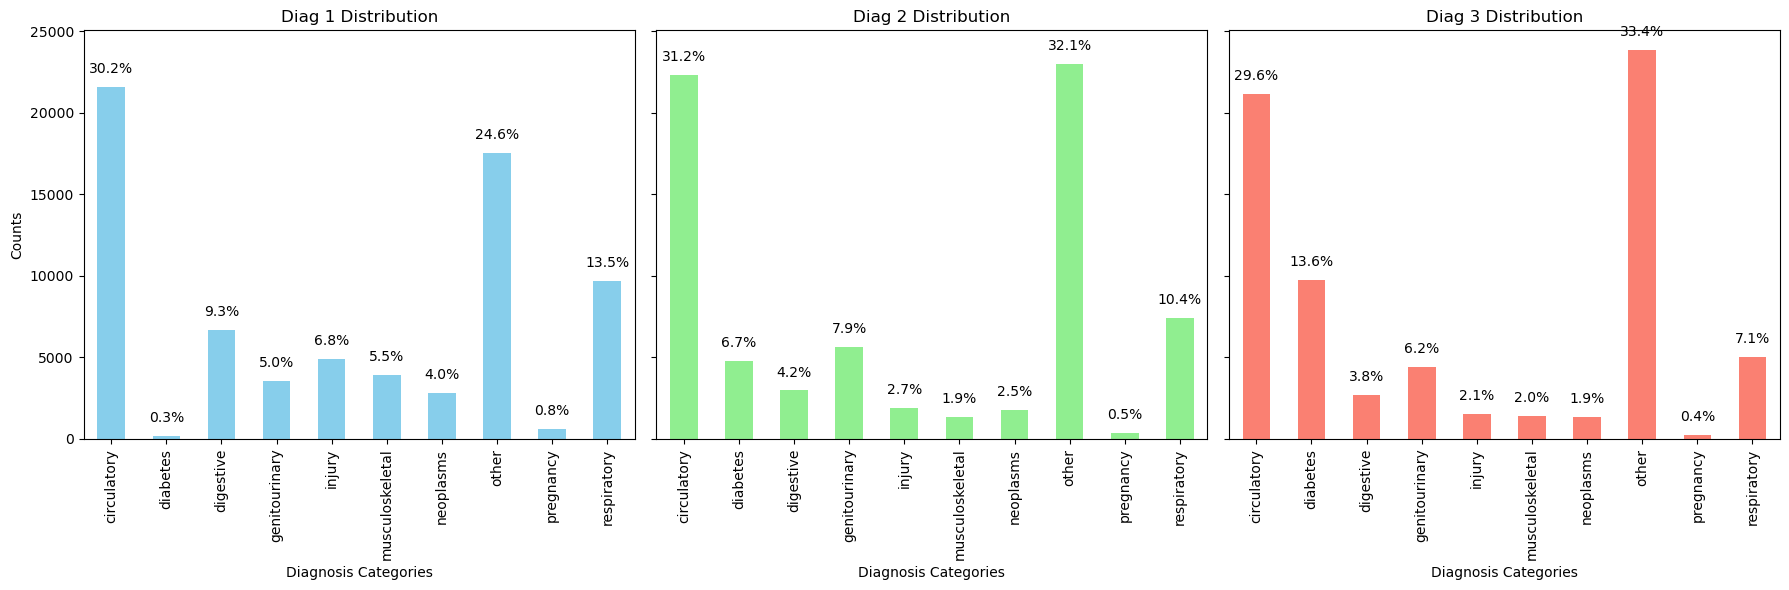

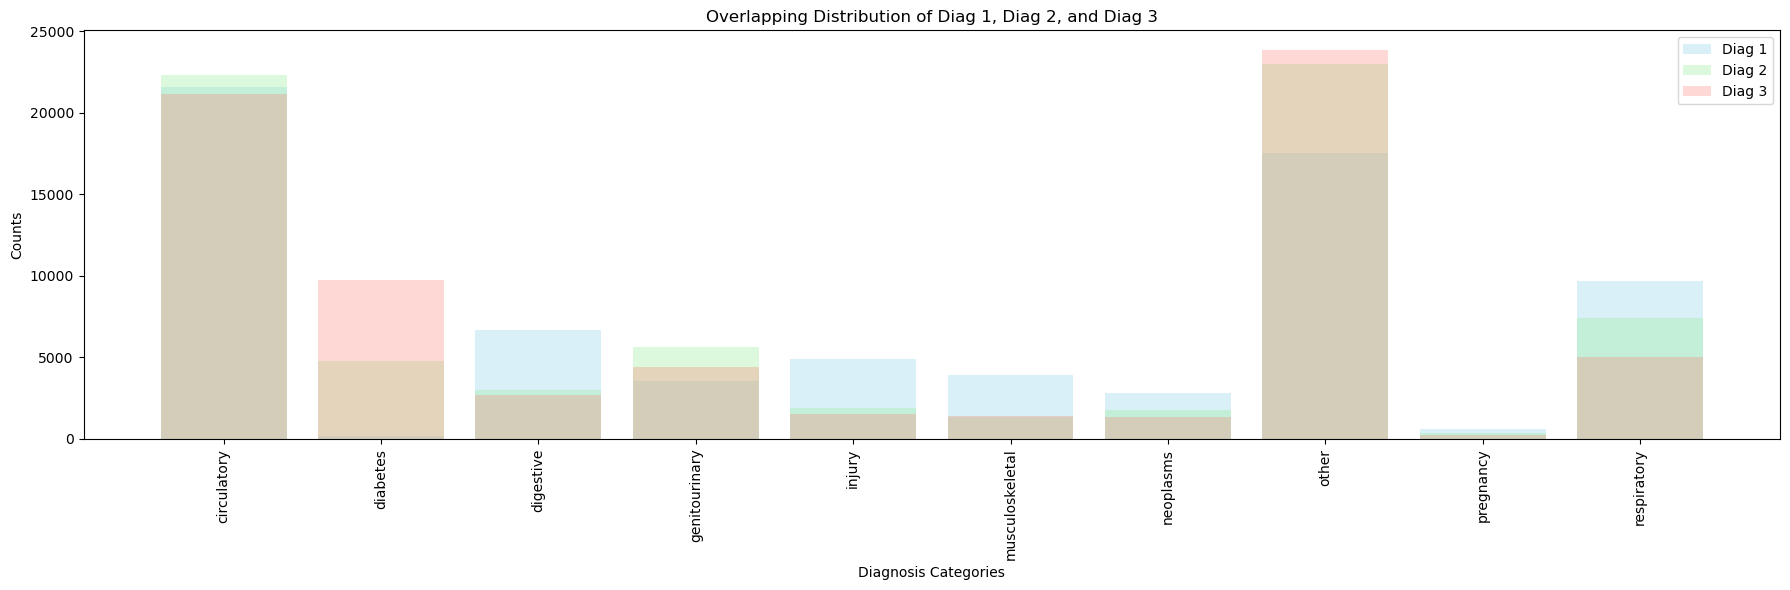

In [777]:
import matplotlib.pyplot as plt

# Assuming diag_1_counts, diag_2_counts, diag_3_counts are already defined

# Function to annotate bars with percentages
def annotate_bars(ax, counts):
    total = counts.sum()
    for p in ax.patches:
        percentage = f'{100 * p.get_height() / total:.1f}%'
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), textcoords="offset points", xytext=(0,10), ha='center')

# Setup the matplotlib figure and axes for the bar charts
fig, axs = plt.subplots(1, 3, figsize=(18, 6), sharey=True)  # sharey to have the same y-axis scale

# Plotting the distribution of diagnoses in diag_1 with percentages
diag_1_counts.plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Diag 1 Distribution')
axs[0].set_xlabel('Diagnosis Categories')
axs[0].set_ylabel('Counts')
annotate_bars(axs[0], diag_1_counts)

# Plotting the distribution of diagnoses in diag_2 with percentages
diag_2_counts.plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Diag 2 Distribution')
axs[1].set_xlabel('Diagnosis Categories')
annotate_bars(axs[1], diag_2_counts)

# Plotting the distribution of diagnoses in diag_3 with percentages
diag_3_counts.plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Diag 3 Distribution')
axs[2].set_xlabel('Diagnosis Categories')
annotate_bars(axs[2], diag_3_counts)

# Adjust layout for better visual presentation
plt.tight_layout()

plt.show()


import matplotlib.pyplot as plt

# Assuming diag_1_counts, diag_2_counts, diag_3_counts are defined

# Create a combined DataFrame for easier plotting
combined_counts = pd.DataFrame({
    'Diag 1': diag_1_counts,
    'Diag 2': diag_2_counts,
    'Diag 3': diag_3_counts
}).fillna(0)  # Ensure all NaN values are set to 0

# Plotting
plt.figure(figsize=(18, 6))

# Plot each diagnosis count with semi-transparency
plt.bar(combined_counts.index, combined_counts['Diag 1'], color='skyblue', alpha=0.3, label='Diag 1')
plt.bar(combined_counts.index, combined_counts['Diag 2'], color='lightgreen', alpha=0.3, label='Diag 2')
plt.bar(combined_counts.index, combined_counts['Diag 3'], color='salmon', alpha=0.3, label='Diag 3')

plt.title('Overlapping Distribution of Diag 1, Diag 2, and Diag 3')
plt.xlabel('Diagnosis Categories')
plt.ylabel('Counts')
plt.xticks(rotation=90)  # Rotate labels to avoid overlap
plt.legend()

plt.tight_layout()
plt.show()



In [778]:
# Check if each diagnosis is 'diabetes', then sum up the True values across the columns
total_diabetes_count = (
    (df_max_time['diag_1'] == 'diabetes').sum() +
    (df_max_time['diag_2'] == 'diabetes').sum() +
    (df_max_time['diag_3'] == 'diabetes').sum()
)

print(f"Total count of 'diabetes' diagnoses across diag_1, diag_2, and diag_3: {total_diabetes_count}")

total_rows = df_max_time.shape[0]

print(f"Total number of rows in the DataFrame: {total_rows}")


Total count of 'diabetes' diagnoses across diag_1, diag_2, and diag_3: 14715
Total number of rows in the DataFrame: 71515


In [779]:
# I am confused if all of the patinets are dignosed with diabetes, why the total count of diabetes is less than the total patient number 
# need to figure out

##### 'change', 'diabetesMed',readmitted

change:Ch=1,No=0

diabetesMed:Yes=1,No=0

Readmitted: '<30' = 1,'>30'/'NO' = 0


In [780]:
# Convert 'change' categories: 'Ch' to 1, 'No' to 0
df_max_time['change'] = df_max_time['change'].map({'Ch': 1, 'No': 0})

# Convert 'diabetesMed' categories: 'Yes' to 1, 'No' to 0
df_max_time['diabetesMed'] = df_max_time['diabetesMed'].map({'Yes': 1, 'No': 0})

# Convert 'readmitted' categories: '<30' to 1, '>30' and 'NO' to 0
df_max_time['readmitted'] = df_max_time['readmitted'].map({'<30': 1, '>30': 0, 'NO': 0})




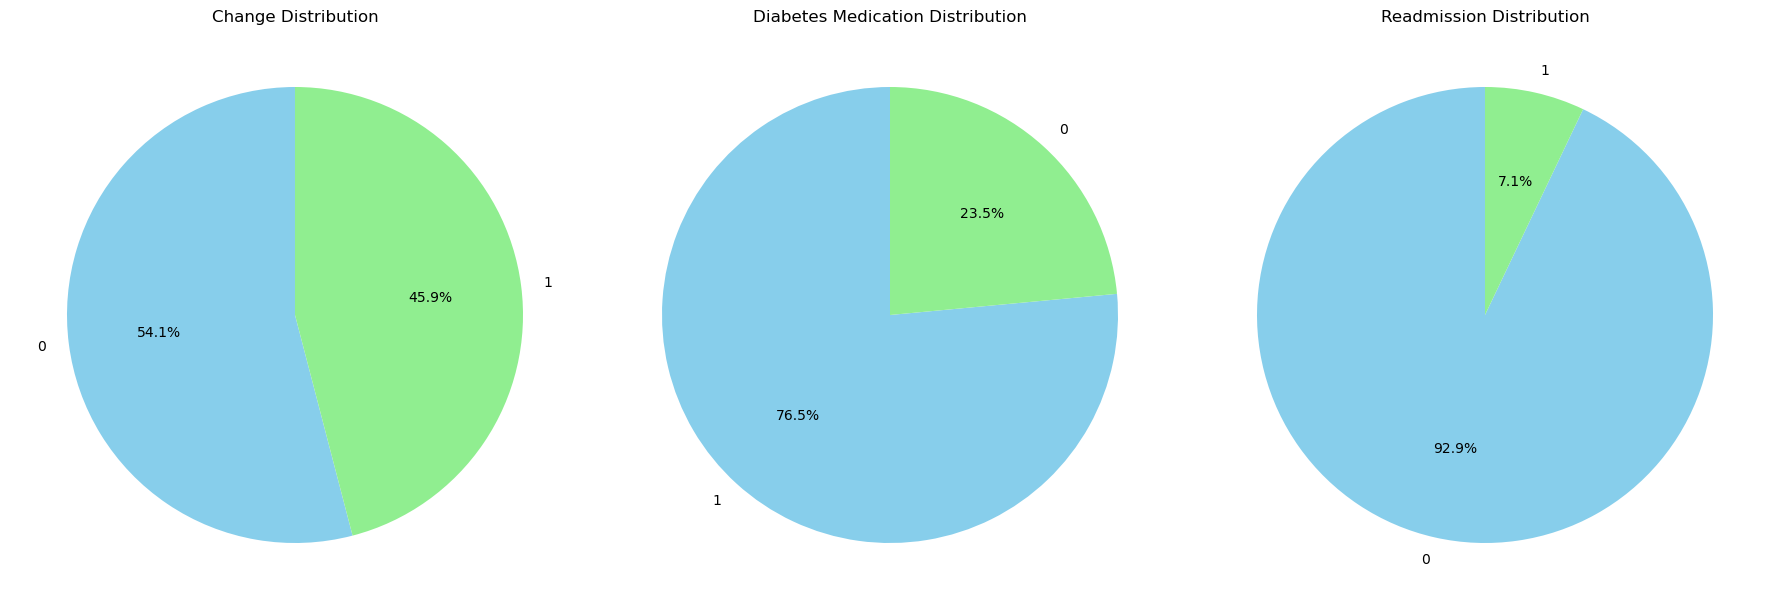

In [781]:

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# 'change' distribution
df_max_time['change'].value_counts().plot(kind='pie', ax=axs[0], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axs[0].set_title('Change Distribution')
axs[0].set_ylabel('')

# 'diabetesMed' distribution
df_max_time['diabetesMed'].value_counts().plot(kind='pie', ax=axs[1], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axs[1].set_title('Diabetes Medication Distribution')
axs[1].set_ylabel('')

# 'readmitted' distribution
df_max_time['readmitted'].value_counts().plot(kind='pie', ax=axs[2], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightgreen'])
axs[2].set_title('Readmission Distribution')
axs[2].set_ylabel('')

plt.tight_layout()
plt.show()


### Numerical data

####  time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses


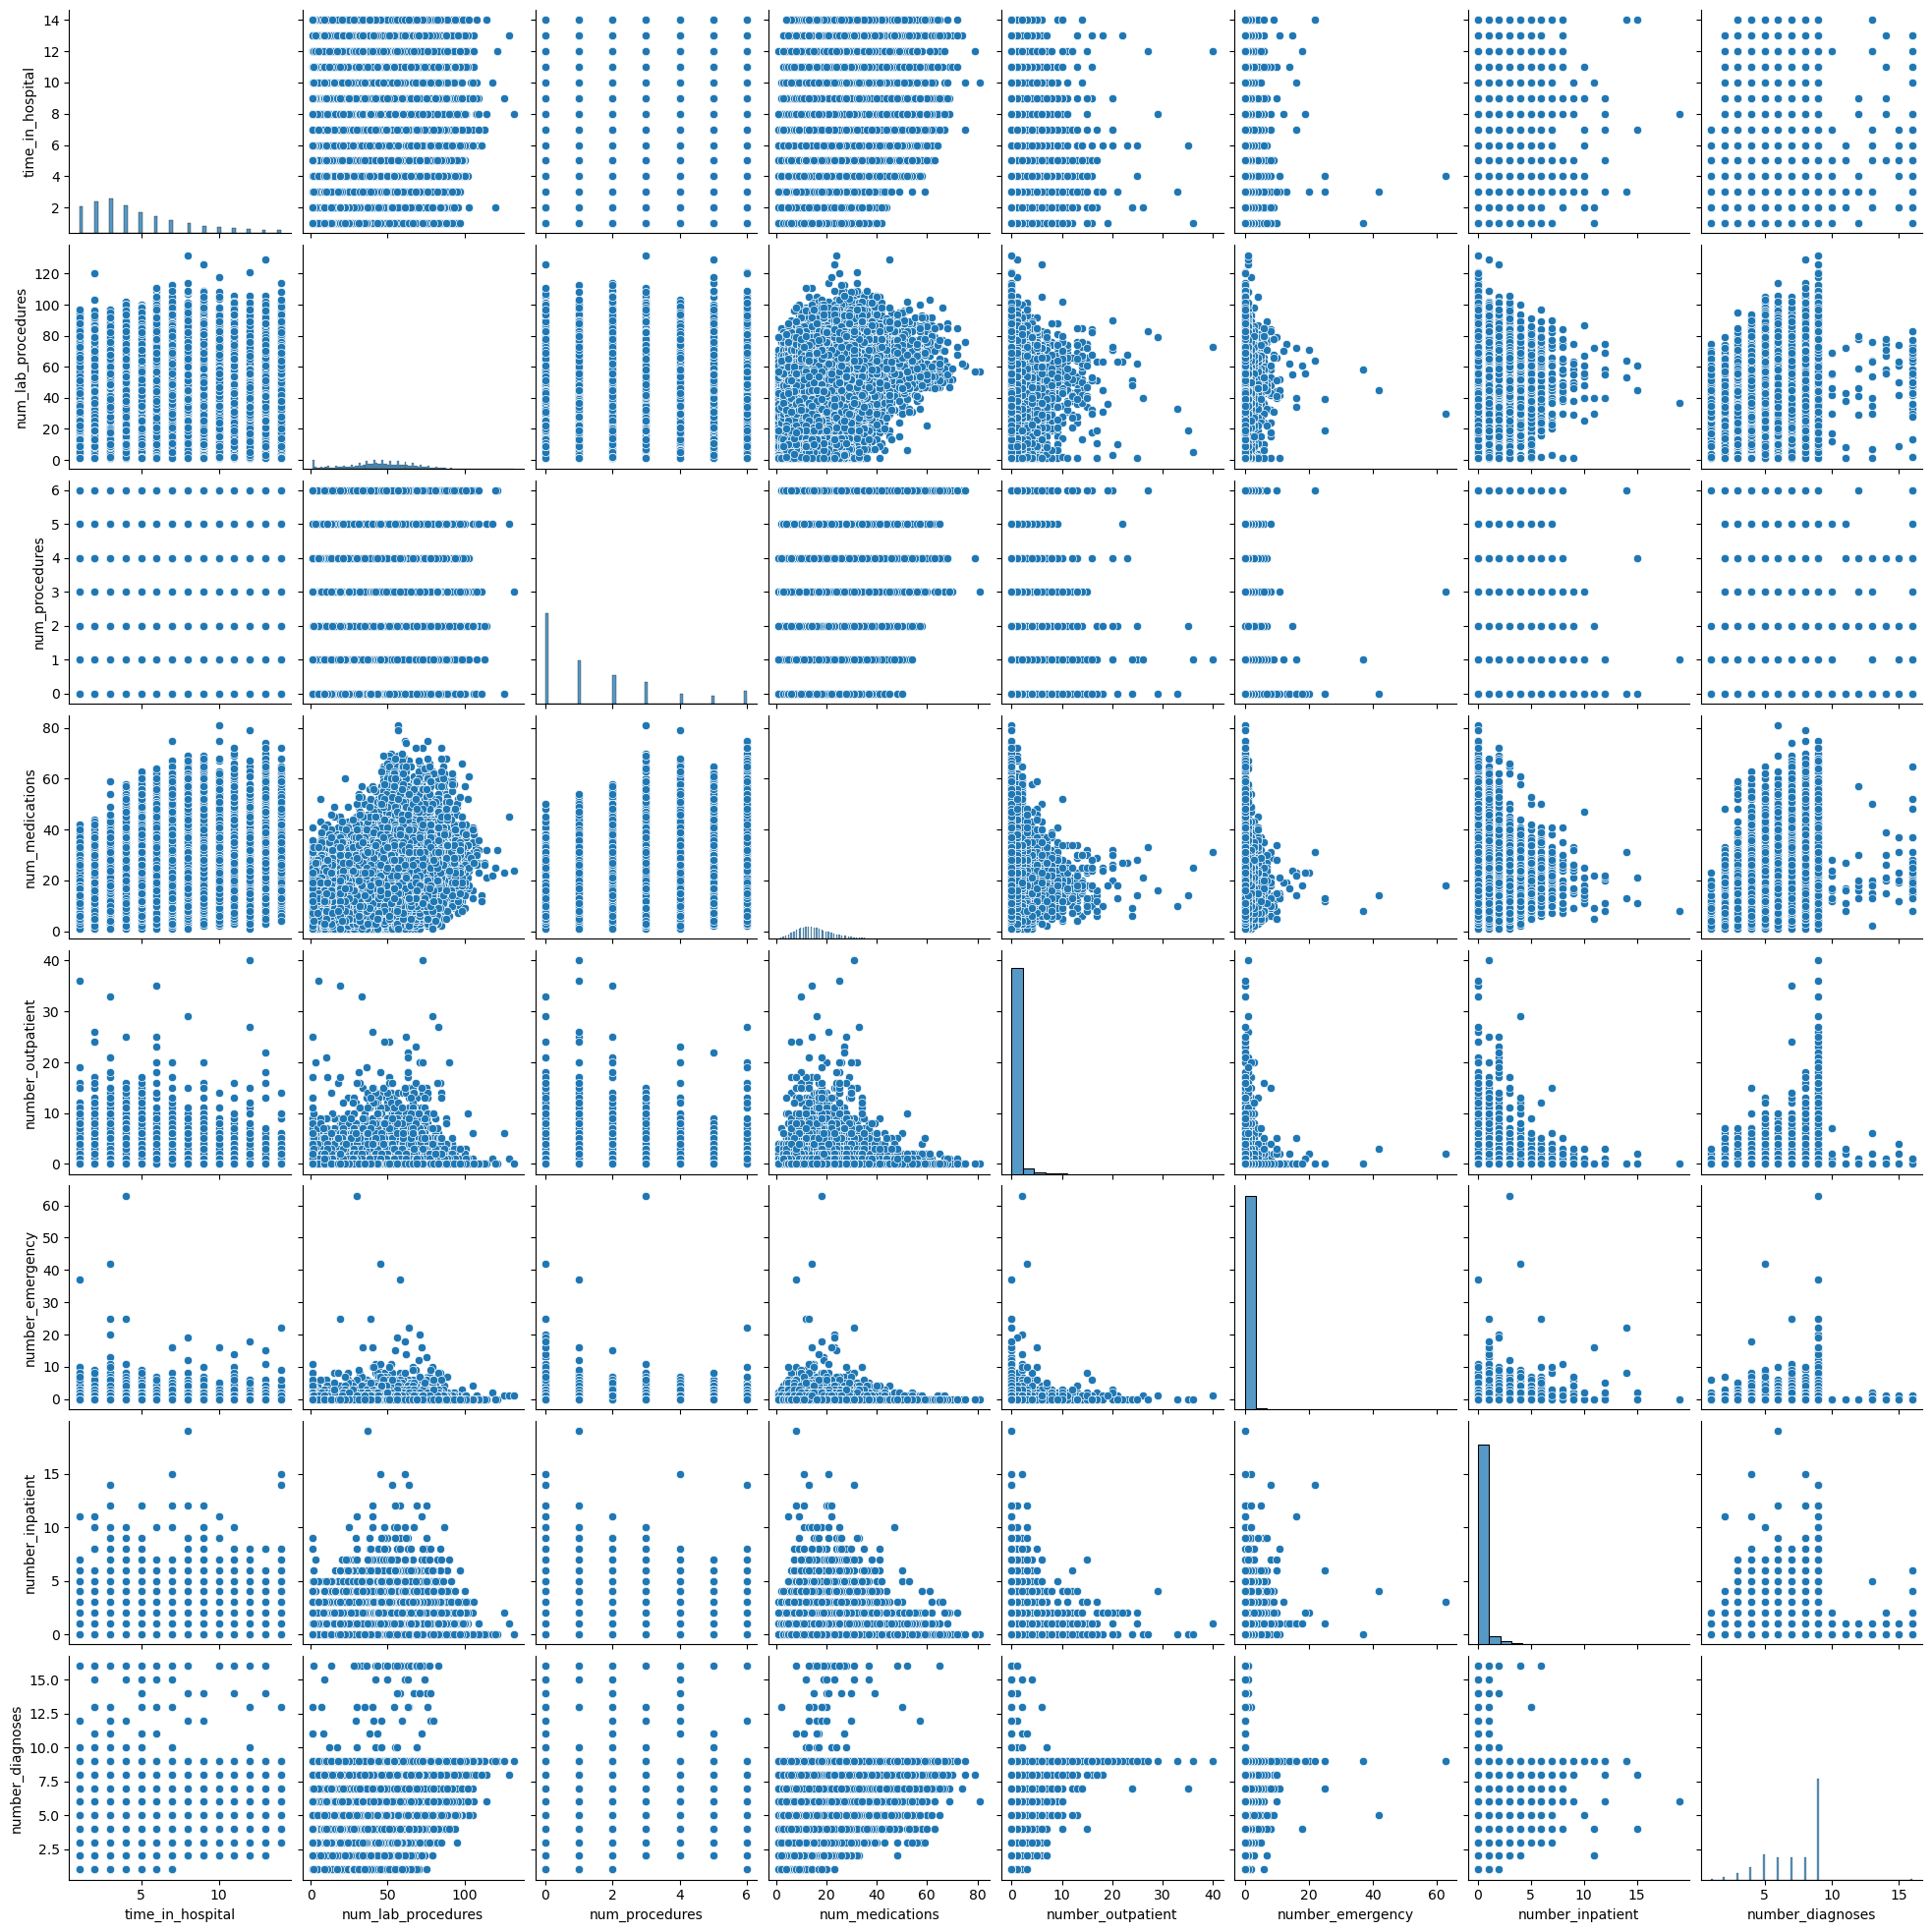

In [782]:
import seaborn as sns

# List of variables for the pair plot
vars_for_pairplot = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
                     'num_medications', 'number_outpatient', 'number_emergency', 
                     'number_inpatient', 'number_diagnoses']

# Creating a pair plot
sns.pairplot(df_max_time[vars_for_pairplot])

plt.show()


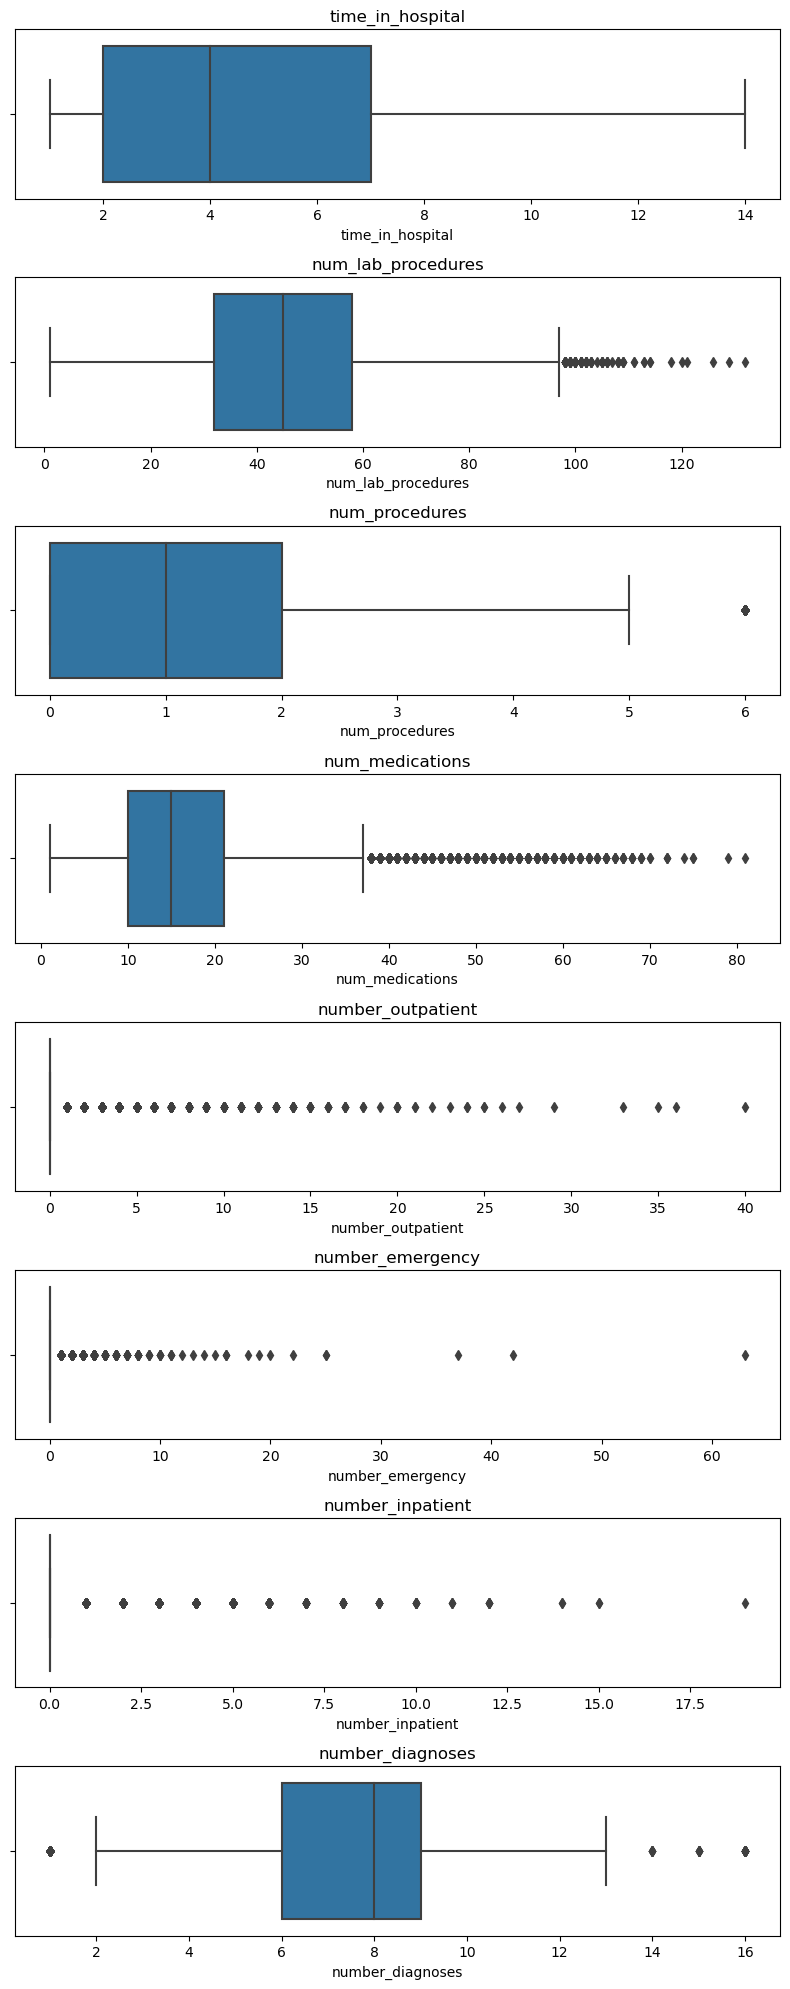

In [783]:
variables = ['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
             'num_medications', 'number_outpatient', 'number_emergency', 
             'number_inpatient', 'number_diagnoses']

fig, axs = plt.subplots(len(variables), 1, figsize=(8, 20))

for i, var in enumerate(variables):
    sns.boxplot(x=df_max_time[var], ax=axs[i])
    axs[i].set_title(var)

plt.tight_layout()
plt.show()


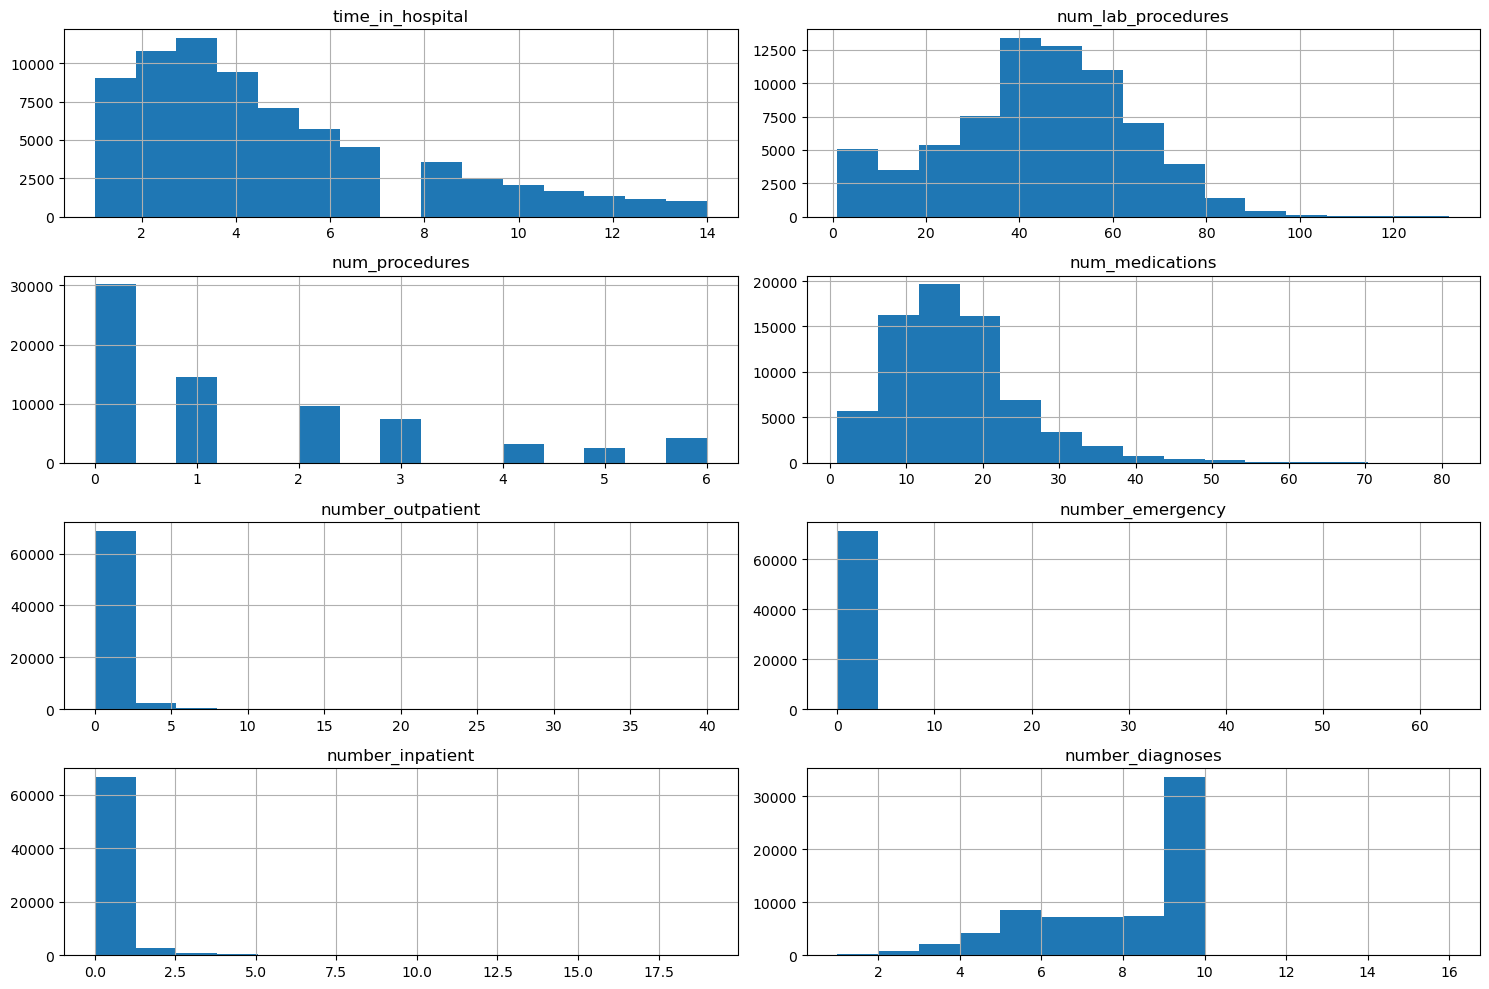

In [784]:
df_max_time[['time_in_hospital', 'num_lab_procedures', 'num_procedures', 
             'num_medications', 'number_outpatient', 'number_emergency', 
             'number_inpatient', 'number_diagnoses']].hist(bins=15, figsize=(15, 10), layout=(4, 2))
plt.tight_layout()
plt.show()


## 1.1.3 Biomarker Data in C4

### Direct Biomarkers:'max_glu_serum', 'A1Cresult': specifically relate to glucose levels of patients




max_glu_serum:

'>200'= 200 

'>300'= 300 

'Norm'= 100 

'None'= 0 

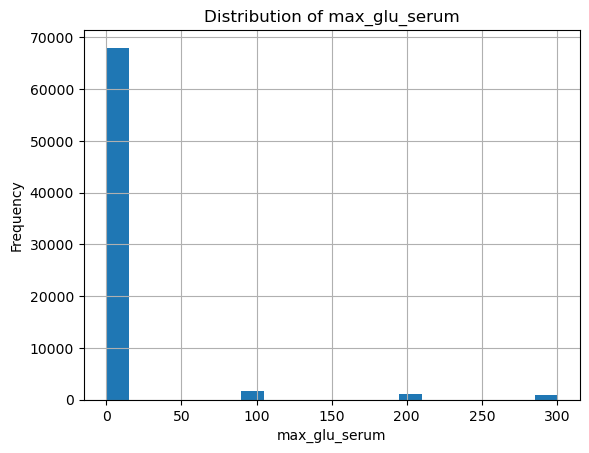

In [726]:
df_max_time['max_glu_serum'] = df_max_time['max_glu_serum'].apply(lambda x : 200 if x == '>200' 
                                                            else ( 300 if x == '>300'                                                          
                                                            else ( 100 if x == 'Norm'
                                                            else  0)))

import matplotlib.pyplot as plt

df_max_time['max_glu_serum'].hist(bins=20)
plt.title('Distribution of max_glu_serum')
plt.xlabel('max_glu_serum')
plt.ylabel('Frequency')
plt.show()


A1Cresult:

'>7'= 7

'>8'= 8

Norm = 5 

None = 0 

In [727]:
df_max_time['A1Cresult'] = df_max_time['A1Cresult'].apply(lambda x : 7 if x == '>7' 
                                                         else (8 if  x == '>8'                                                        
                                                         else ( 5 if x == 'Norm'
                                                         else  0)))

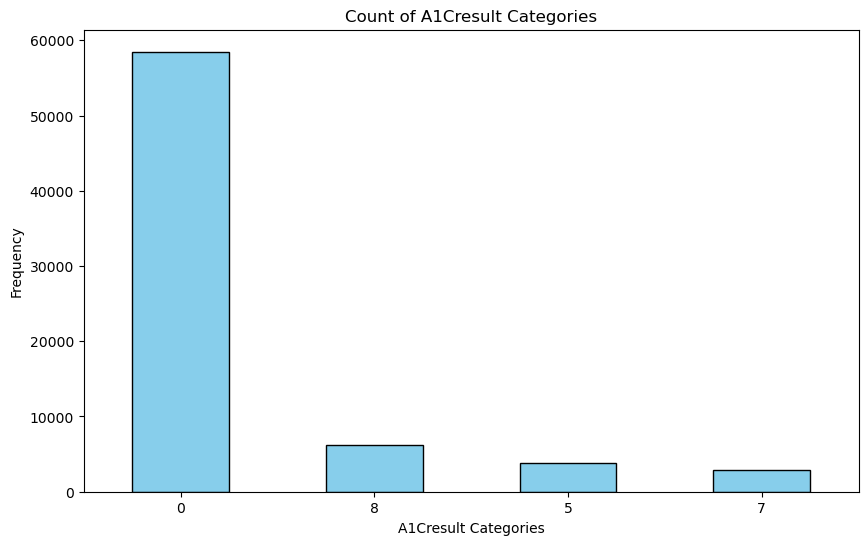

In [728]:
a1c_counts = df_max_time['A1Cresult'].value_counts(dropna=False)

# Plotting a histogram (bar chart) for the counts of 'A1Cresult' categories
plt.figure(figsize=(10, 6))
a1c_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Count of A1Cresult Categories')
plt.xlabel('A1Cresult Categories')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  # Adjust rotation as needed
plt.show()

### Indirect Biomarkers: 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'

### They are medications used to manage diabetes and do not directly indicate glucose levels

Value Transformation:

'Up'= 10

'Down'= -10

'Steady'= 0

'No'= -20

In [729]:
# Check the statistically significant association between each C4 variable (e.g., metformin, repaglinide, etc.) and the readmission status of patients

from scipy.stats import chi2_contingency
import pandas as pd

C4_vars = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                    'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                    'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                    'miglitol', 'troglitazone', 'tolazamide', 'examide', 
                    'citoglipton', 'insulin', 'glyburide-metformin', 
                    'glipizide-metformin', 'glimepiride-pioglitazone', 
                    'metformin-rosiglitazone', 'metformin-pioglitazone']

for var in C4_vars:
    contingency_table = pd.crosstab(df[var], df['readmitted'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    significance = "Significant" if p < 0.05 else "Not Significant"
    print(f"{var} - p-value: {p:.4f} ({significance})")



metformin - p-value: 0.0000 (Significant)
repaglinide - p-value: 0.0000 (Significant)
nateglinide - p-value: 0.7544 (Not Significant)
chlorpropamide - p-value: 0.1761 (Not Significant)
glimepiride - p-value: 0.0107 (Significant)
acetohexamide - p-value: 0.3940 (Not Significant)
glipizide - p-value: 0.0000 (Significant)
glyburide - p-value: 0.1246 (Not Significant)
tolbutamide - p-value: 0.4415 (Not Significant)
pioglitazone - p-value: 0.0000 (Significant)
rosiglitazone - p-value: 0.0000 (Significant)
acarbose - p-value: 0.0000 (Significant)
miglitol - p-value: 0.0717 (Not Significant)
troglitazone - p-value: 0.4878 (Not Significant)
tolazamide - p-value: 0.2785 (Not Significant)
examide - p-value: 1.0000 (Not Significant)
citoglipton - p-value: 1.0000 (Not Significant)
insulin - p-value: 0.0000 (Significant)
glyburide-metformin - p-value: 0.2022 (Not Significant)
glipizide-metformin - p-value: 0.3592 (Not Significant)
glimepiride-pioglitazone - p-value: 0.3940 (Not Significant)
metform

In [730]:
#Check the disticnt value in those variables

# Calculate the number of unique values for each categorical variable
for var in C4_vars:
    if df[var].nunique() == 1:
        print(f"The variable '{var}' has only one distinct value.")


The variable 'examide' has only one distinct value.
The variable 'citoglipton' has only one distinct value.


In [731]:
## examide,citoglipton have no variance and not statistically signifinicant, we can drop out those two variables
df_max_time = df_max_time.drop(['examide', 'citoglipton'], axis=1)




In [733]:
# List of columns to exclude
exclude_columns = ['examide', 'citoglipton']

# Iterate over each column in C4_vars
for col in [var for var in C4_vars if var not in exclude_columns]:
    # Apply the conditional transformation
    df_max_time[col] = df_max_time[col].apply(lambda x: 10 if x == 'Up' 
                                               else (-10 if x == 'Down'
                                                     else (0 if x == 'Steady'
                                                           else -20)))


In [734]:
df_max_time.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,tolazamide,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
4267,24437208,135,Caucasian,Female,[50-60),NaN,1,Home,Referral,8,...,-20,0,-20,-20,-20,-20,-20,1,1,1
5827,29758806,378,Caucasian,Female,[50-60),NaN,1,Home,Referral,2,...,-20,-20,-20,-20,-20,-20,-20,0,0,0
67608,189899286,729,Caucasian,Female,[80-90),NaN,1,Facility,Other,4,...,-20,-20,-20,-20,-20,-20,-20,0,1,0
17494,64331490,774,Caucasian,Female,[80-90),NaN,1,Home,Other,3,...,-20,-20,-20,-20,-20,-20,-20,1,1,0
2270,14824206,927,AfricanAmerican,Female,[30-40),NaN,1,Home,Other,5,...,-20,-20,-20,-20,-20,-20,-20,0,1,0


### Data visualization

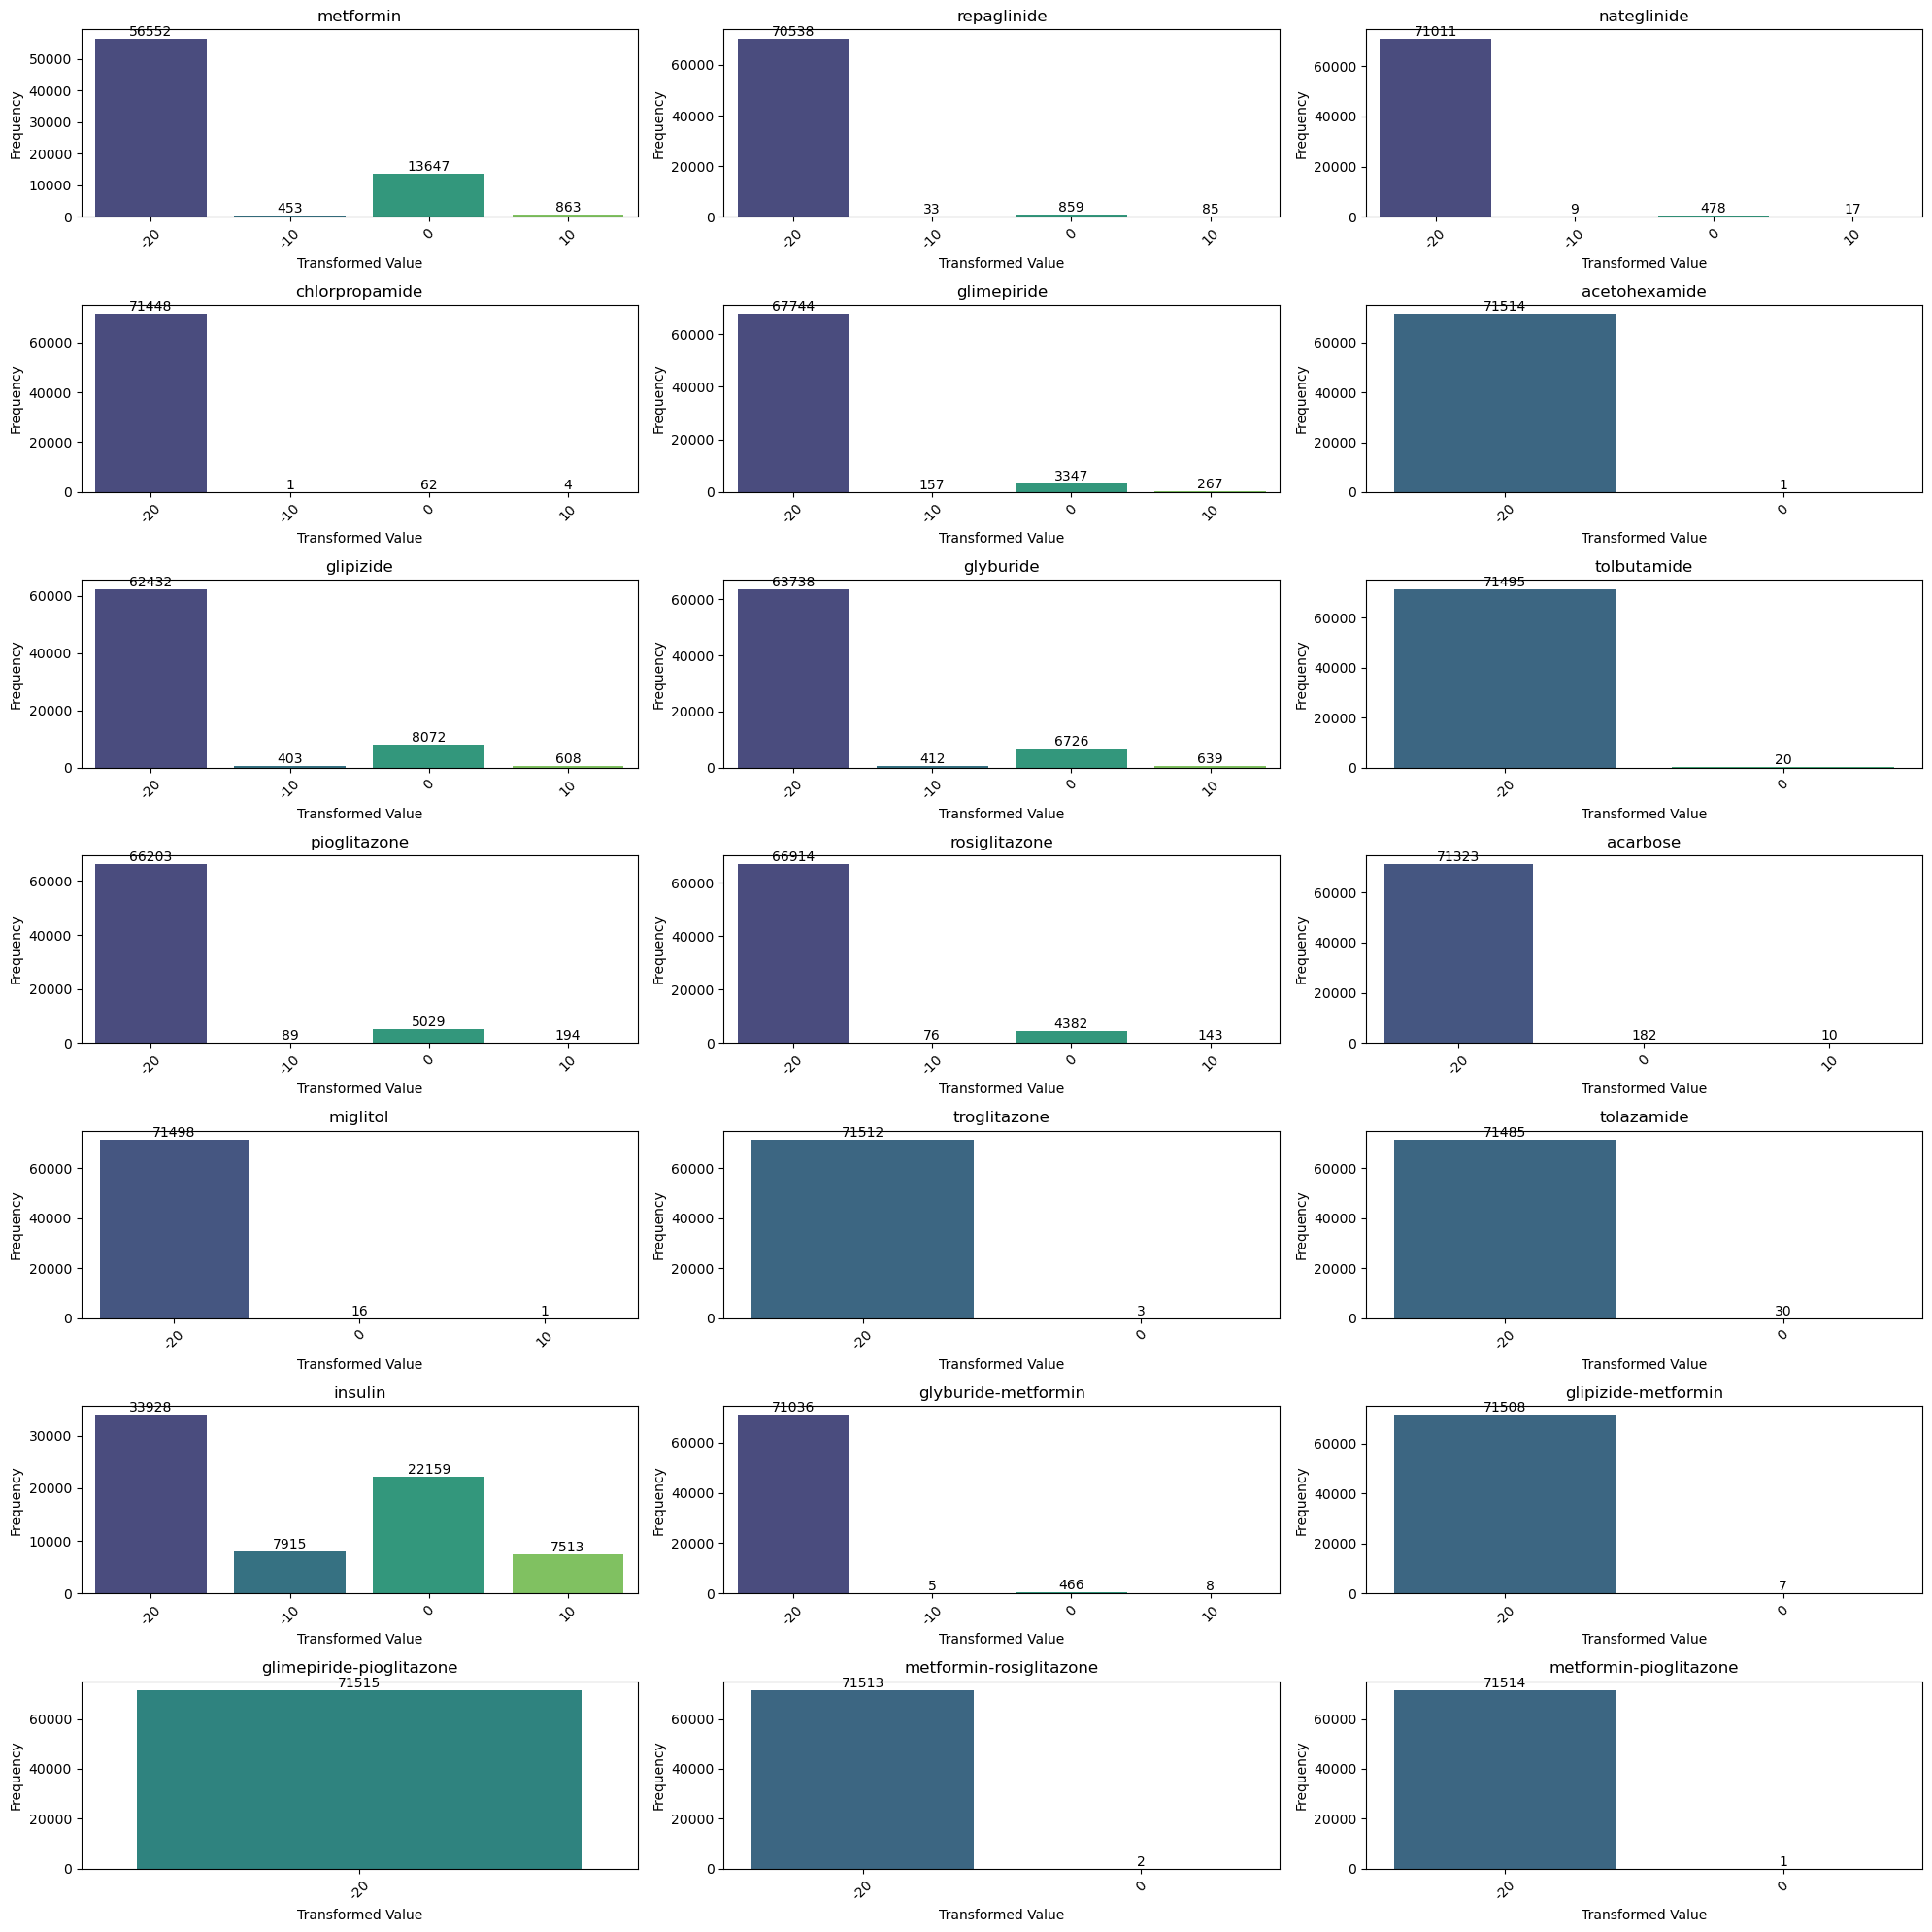

In [735]:

C4_vars_transformed = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 
                       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 
                       'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 
                       'insulin', 'glyburide-metformin', 
                       'glipizide-metformin', 'glimepiride-pioglitazone', 
                       'metformin-rosiglitazone', 'metformin-pioglitazone']



plt.figure(figsize=(20, 20))
n_rows = (len(C4_vars_transformed) + 2) // 3

for i, var in enumerate(C4_vars_transformed, 1):
    plt.subplot(n_rows, 3, i)
    # Calculate the counts for each unique value in the variable
    counts = df_max_time[var].value_counts(dropna=False)
    # Sort the index to ensure the bars are in order of the transformed value
    counts = counts.sort_index()
    # Create a bar plot
    sns.barplot(x=counts.index, y=counts.values, palette='viridis')
    plt.title(var)
    plt.xlabel('Transformed Value')
    plt.ylabel('Frequency')

    # Annotate each bar with its count
    for index, value in enumerate(counts.values):
        plt.text(index, value, str(value), ha='center', va='bottom')
    
    # Adjust x-ticks to show only values present in the data
    plt.xticks(rotation=45) 
plt.tight_layout()
plt.show()



# 2. Correlation Analysis



C1: encounter_id, patient_nbr

C2:race,gender,age

C3: weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency,number_inpatient,number_diagnoses,'diag_1', 'diag_2', 'diag_3','change', 'diabetesMed',readmitted

C4: 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone'



## 2.1 Correlation Analysis between C3 and C4

### Correlation between the frequency of weight values and the frequencies of max_glu_serum and A1Cresult values

In [744]:

non_missing_weight_count = df_max_time['weight'].notna().sum()

print(f"Number of cells in the 'weight' column with no missing values: {non_missing_weight_count}")




Number of cells in the 'weight' column with no missing values: 2861


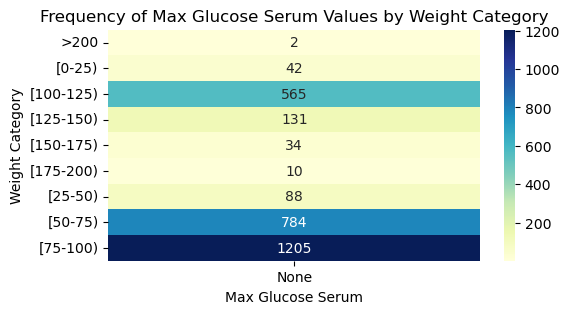

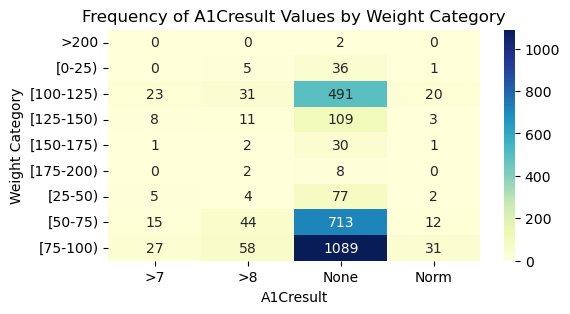

In [787]:
# Filtering rows that have a weight value
df_with_weight = df_max_time.dropna(subset=['weight'])

# Aggregating to get counts of max_glu_serum and A1Cresult for each weight category
max_glu_serum_counts = df_with_weight.groupby('weight')['max_glu_serum'].value_counts().unstack(fill_value=0)
a1cresult_counts = df_with_weight.groupby('weight')['A1Cresult'].value_counts().unstack(fill_value=0)

# Plotting max_glu_serum frequencies for each weight category
plt.figure(figsize=(6, 3))
sns.heatmap(max_glu_serum_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Frequency of Max Glucose Serum Values by Weight Category')
plt.xlabel('Max Glucose Serum')
plt.ylabel('Weight Category')
plt.show()

# Plotting A1Cresult frequencies for each weight category
plt.figure(figsize=(6,3))
sns.heatmap(a1cresult_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Frequency of A1Cresult Values by Weight Category')
plt.xlabel('A1Cresult')
plt.ylabel('Weight Category')
plt.show()


In [ ]:
# Due to too many missing values in the weight and major of value for Max Glucose Serum and A1Cresult are None. The correlation between them can not be tell. but still prodominetly people in our sample population who have known weight value, they weigh between 75 to 100 pounds.
#  

### Analysis 1: 
Make sure to add some explanation of what you are doing in your code. This will help you and whoever will read this a lot in following your steps.

### Analysis 2: 

In [4]:
# ...

### Analysis n:

In [5]:
# ...